----

# **Topic: Monte-Carlo Simulations to compute VaR and Expected Shortfall**
<div class="alert alert-info ">
    <strong>Problem statement:</strong>


In the SFM module, you learned to calculate the Value-at-Risk (VaR) and the expected shortfall (also known as Conditional VaR or CVaR) for an asset using Monte Carlo simulations in Excel.

In this project, you will compute the following using Python:
- Historical VaR and CVaR
- Parametric VaR and CVaR
- Monte Carlo VaR and CVaR
</div>

<div class="alert alert-info ">
    <strong>Steps to perform for this project:</strong>

1. Import the libraries
2. Download the data
3. Analyze the returns distribution
4. Compute the historical VaR and C-VaR (Expected shortfall)
5. Compute the parametric VaR and C-VaR (Expected shortfall)
6. Scaling the VaR
7. Monte Carlo simulations
    </div>

----

### **Section 1: Import the libraries**

Import the libraries with the aliases given in the brackets
 
- yfinance (yf)
- pandas (pd)
- numpy (np)
- matplotlib.pyplot (plt)
- datetime (dt)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Run this before importing yfinance in Google Colab
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

In [5]:
# Settings the figsize parameter for the plots in this notebook to standardize the size of plots
plt.rcParams["figure.figsize"] = (15, 8)



---



### **Section 2: Analyze the returns distribution**

**Step 1**

In order to calculate returns, you'll first need stock price data. For this, you can fetch data from Yahoo Finance using `yfinance`.

Follow these steps:
1.   Set the parameters for start and end date, and the ticker.
2.   Import the data from Yahoo Finance using the `yfinance` library.
3.   Print a message saying '< n > number of records downloaded'.



In [6]:
start_date=dt.date(2020,1,1)
end_date=dt.date(2024,3,21)
ticker="INFY"

df=yf.download(tickers=ticker,start=start_date,end=end_date,progress=False)
print(f"{df.shape[0]} number of records are downloaded")

1061 number of records are downloaded


**Step 2**

Now that you've downloaded the data, you need to compute the simple daily returns.

Follow these steps:
1. Compute simple returns
2. Check the first five rows of the dataframe.
3. Check the last five rows of the dataframe.

In [7]:
df['simple_returns']=(df['Adj Close'].pct_change())
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,simple_returns
Date,,,,,,,
2020-01-02,10.30,10.34,10.23,10.29,9.384840,5688000,NaN
2020-01-03,10.29,10.35,10.26,10.31,9.403079,6992200,0.001943
2020-01-06,10.22,10.25,10.17,10.21,9.311876,10068900,-0.009699
2020-01-07,10.12,10.17,10.10,10.10,9.211553,10589100,-0.010774
2020-01-08,10.00,10.12,9.99,10.09,9.202433,13440400,-0.000990


**HINT**:
You need to call the dot pct_change() method on the proper column.

**Step 3**

Let's now visualize the return distribution. For this, you will use the `hist` function from the `matplotlib.pyplot` module.
However, as we saw earlier, the first row of the returns contains null values. So we need to drop these before passing it to the `hist` function.
Setting bins equal to a large number will spread out your plot, but a low number will cause a lack of resolution.

(array([  1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,
          4.,   2.,   2.,   2.,   4.,   4.,  16.,  18.,  30.,  46.,  69.,
        105., 110., 134., 146., 106.,  89.,  56.,  38.,  27.,  13.,  16.,
          5.,   1.,   2.,   3.,   0.,   1.,   0.,   1.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([-0.12052521, -0.11562179, -0.11071836, -0.10581494, -0.10091152,
        -0.0960081 , -0.09110468, -0.08620126, -0.08129784, -0.07639442,
        -0.071491  , -0.06658758, -0.06168416, -0.05678074, -0.05187732,
        -0.0469739 , -0.04207048, -0.03716706, -0.03226364, -0.02736022,
        -0.0224568 , -0.01755337, -0.01264995, -0.00774653, -0.00284311,
         0.00206031,  0.00696373,  0.01186715,  0.01677057,  0.02167399,
         0.02657741,  0.03148083,  0.03638425,  0.04128767,  0.04619109,
         0.05109451,  0.05599793,  0.06090135,  0.06580477,  0.0707082 ,
         0.07561162,  0.08051504,  0.08541846,  0.09032188,  0.0952253 ,
 

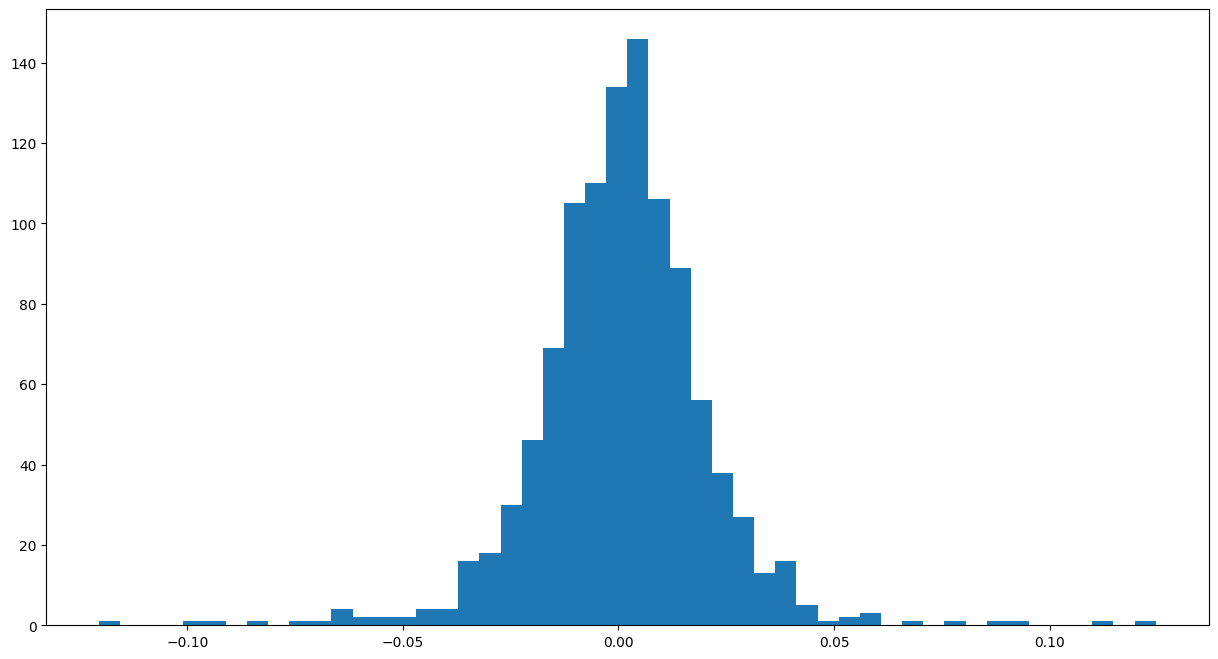

In [8]:
df = df.drop(df.index[0])
plt.hist(df['simple_returns'],50)

**Step 4**

Now, you need to compute the mean and standard deviation of the returns. You also need to compute the annualized average returns using the formula below:

$\text{Average Annualized Return} = ( ( 1 + \mu ) ^ {252}) - 1$


Standard deviation for T time periods can be computed using the following formula:

$\sigma_{annual} = \sigma_{daily} * \sqrt{T}$

Follow these steps:
1. Compute the average daily returns and the annualized returns.
2. Compute the standard deviation of the returns and the annualized volatility.
3. Compute the annualized variance.
4. Compute the skewness and kurtosis of the returns.

In [9]:
#1 Average Daily Returns
avg_daily_returns=df['simple_returns'].mean()
daily_std=np.std(df['simple_returns'])
daily_std

0.019808248611597672

**HINT**: 
- You can use the np.mean() and np.std() functions to compute the mean and standard deviation of the returns.
- You can compute the annualized std by multiplying the daily std with the square root of 252.
- You can compute the annualized variance by squaring the annualized std.

Compute the skewness and excess kurtosis of returns using the **skew()** and **kurtosis()** functions from the **scipy.stats** library. 
Note: You need to add the necessary imports here.

In [10]:
from scipy.stats import skew, kurtosis
skewness=skew(df['simple_returns'])
skewness
kurtosis=kurtosis(df['simple_returns'])

**HINT**: 
- This is the syntax: scipy.stats.skew(_Returns column_). Remember to drop the null values.
- This is the syntax: scipy.stats.kurtosis(_Returns column_). Remember to drop the null values.
    

**Step 5**

Check the normality of the stock returns distribution using the **Shapiro-Wilk test**. You can use the `shapiro()` function from the `scipy.stats` library.

The function will return two values- the first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to assess the normality of the data. If the p-value is less than or equal to 0.05, you can  reject the null hypothesis of normality and assume that the data are non-normally distributed.

In [11]:
# Import the shapiro function from the scipy.stats library
from scipy.stats import shapiro


# Compute the p_value by running the shapiro function on the returns column
test_statistics,p_value=shapiro(df['simple_returns'])

# Print the results
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Null hypothesis of normality is rejected.




---


### **Section 3: Historical VaR and C-VaR (Expected shortfall)**

Value at Risk (VaR) is the maximum loss that one will not exceed with a certain probability α within a given time horizon. It is given as a threshold with a given confidence level that losses will not exceed at that level.

Conditional Value at Risk (CVaR), or Expected Shortfall, is an estimate of
expected losses sustained in the worst (1 - x)% of scenarios.

**Step 1**
1. Define the parameter for the confidence level for the VaR (say, 95).
2. Compute the historical VaR.
3. Compute the historical CVaR.

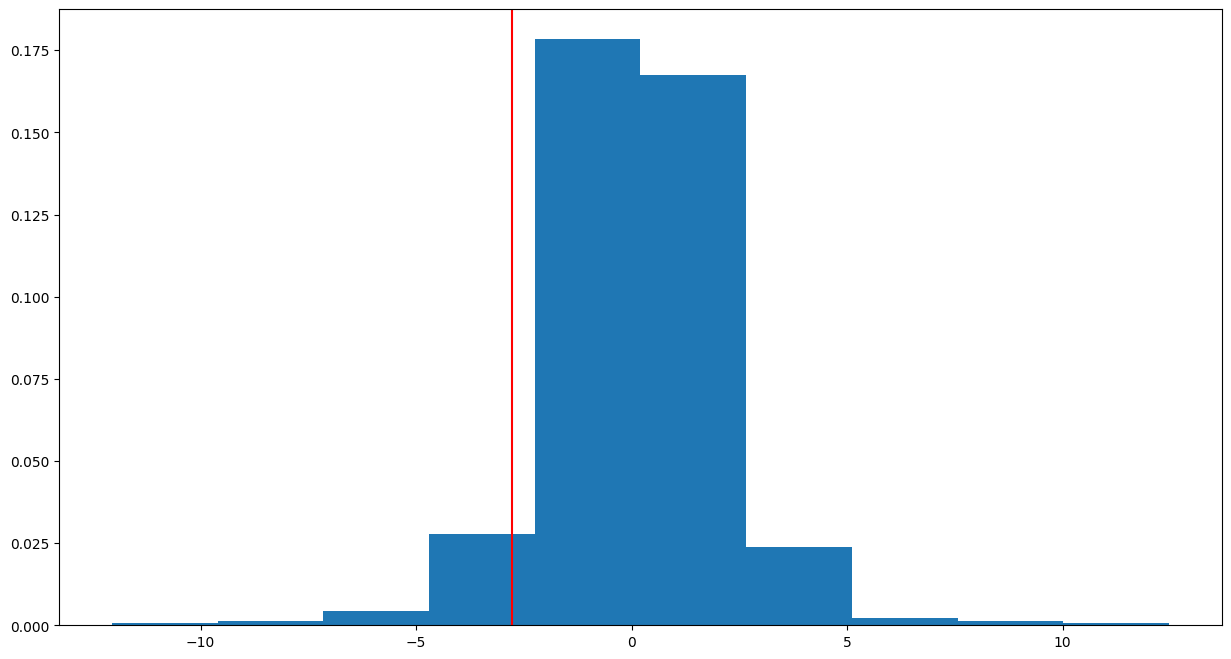

In [12]:
# Define the var level parameter
var_level = 95
rets_percentage= df.simple_returns*100

# Compute and print the historical VaR
var=np.percentile(rets_percentage,100-var_level)

# Sort the returns for plotting
sorted_returns=np.sort(rets_percentage)
plt.hist(sorted_returns,density=True,stacked=True)


# Plot the probability of each sorted return quantile
plt.axvline(x=var,color='red',linestyle='-',
            label="VaR_95")

# Draw a vertical line in the plot for the VaR 95 quantile


**HINT**: You need to use the np.percentile() function. Remember, that you need to compute the lower 5% percentile for VaR(95).

**Step 2**

Compute the Expected Shortfall (CVaR) and plot the results.

The historical value of CVaR(95) is -4.533948337880453.


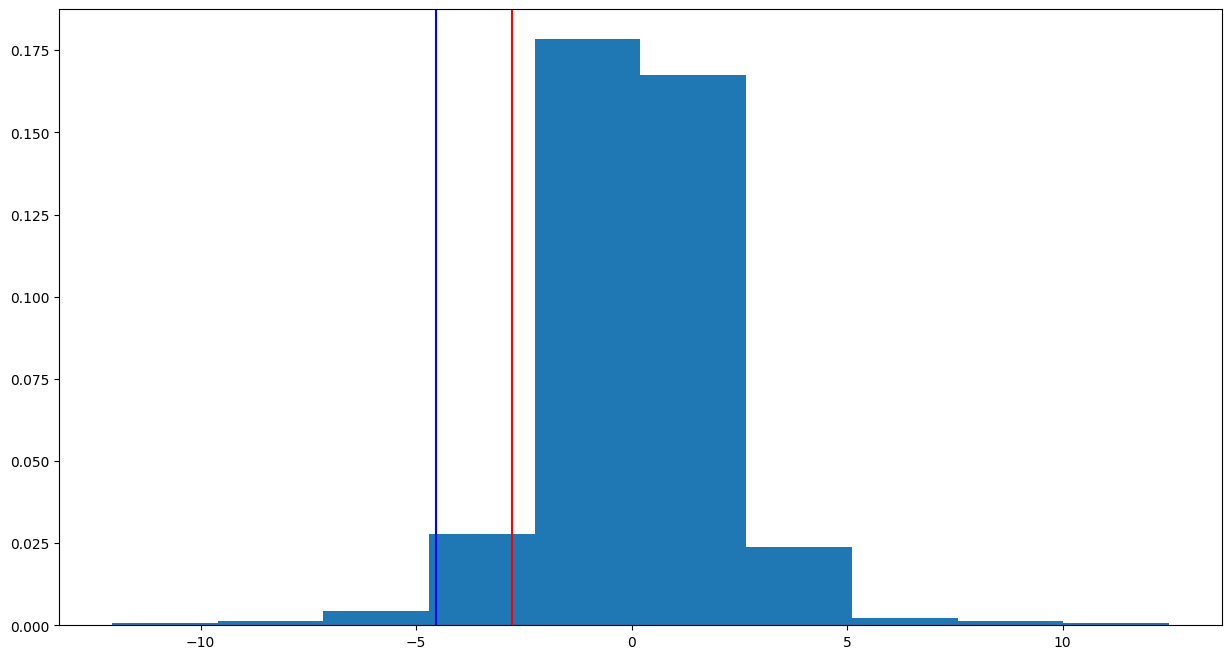

In [13]:
# Compute and print the expected shortfall
cvar=rets_percentage[rets_percentage<var].mean()
print(f"The historical value of CVaR(95) is {cvar}.")

# Plot the probability of each sorted return quantile
plt.hist(sorted_returns,density=True,stacked=True)


# Draw vertical lines in the plot for the VaR 95 and CVaR quantiles
plt.axvline(x=var,color='red',linestyle='-',
            label="VaR_95")
plt.axvline(x=cvar,color='blue',linestyle='-',
            label="CVaR_95")
plt.show()


**HINT**: For expected shortfall, you need to take a mean of the returns lower than the VaR(95).



---



### **Section 4: Parametric VaR and C-VaR (Expected shortfall)**


The **parametric method VAR** (also known as **Variance/Covariance VAR**) calculation is another commonly used form of VaR calculation. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values.
Value at Risk (VaR) is a widely used risk management tool that measures the potential loss in value of a risky asset or portfolio over a defined period for a given confidence interval. The basic formula to calculate VaR can vary depending on the approach used, but the most common methods include the Historical Simulation, the Variance-Covariance method, and the Monte Carlo simulation. Here's a brief overview of each:

1. **Variance-Covariance Method (Parametric VaR)**:
   This method assumes that returns are normally distributed. The formula is:
 $$
   \text{VaR} = \mu + \sigma \times Z_{\alpha}
  $$
   Where:
   - $\mu$  is the mean (or expected value) of the returns.
   - $ \sigma $ is the standard deviation of the returns.
   - $Z_{\alpha} $ is the z-score from the normal distribution corresponding to the desired confidence level \( \alpha \).

2. **Historical Simulation Method**:
   This method does not assume a normal distribution of returns. Instead, it directly uses historical returns data to determine potential future losses. Here, you calculate the potential loss by sorting the historical returns, and then finding the worst loss that still falls within the confidence level \( \alpha \).

3. **Monte Carlo Simulation**:
   This method uses computer algorithms to simulate a large number of possible price paths for the asset or portfolio under consideration based on stochastic processes. The VaR is then estimated from these simulations by determining the worst loss at the desired confidence level.

The choice of method depends on the assumptions one is comfortable making and the computational resources available. The Variance-Covariance method is computationally simplest but relies on the assumption of normally distributed returns, which may not hold for many financial instruments. The Historical and Monte Carlo methods are more computationally intensive but can accommodate non-normal distributions and various complex risk factors.


You can use the `norm.ppf()` function from the `scipy.stats` library for this. You have already computed the mean and standard deviation of the returns earlier.

In [14]:
# Import the necessary library
from scipy.stats import norm
mu=np.mean(rets_percentage)
vol=np.std(rets_percentage)

# Set the confidence level for VaR(95)
var_level95=95
confidence_interval=(100-var_level95)/100


# Calculate the parametric VaR(95)
pvar_95=norm.ppf(confidence_interval,mu,vol)
print(pvar_95)

# Calculate the parametric CVaR(95)

p_cvar_95 = rets_percentage[rets_percentage < pvar_95].mean()
print(p_cvar_95)

-3.172300462893936
-4.9790220053731895


**HINT**:  You can compute parametric VaR(90) using norm.ppf(confidence_level=0.10, mu, vol).

---



### Section 5: Scaling the VaR

The VaR calculated in the previous sections is simply the value at risk for a single day. To estimate the VaR for a longer time duration, scale the value by the square root of time, similar to scaling volatility.

The formula for this is:

 $\text{VaR}_{\text{t days}} = \text{VaR}_{\text{1 day}} * \sqrt{t}$


 Using the above formula, let us see how VaR increases over the time for a period of an year.

 Follow these steps:

 1. Create an empty 2-d array of shape 252x2.
 2. In a for loop, iterate through all the values of days (1-252) and add the time to the first column of the array.
 3. Add the value of VaR for that time period to the second column of the array.
 4. Plot the results by passing the array to the function plot_var() defined below.

In [18]:
def plot_var(array):
  d = pd.DataFrame(abs(array))
  d[1].plot(xlabel='Time', ylabel='Forecasted VaR-95', title = "Time scaled VaR")
  plt.show()


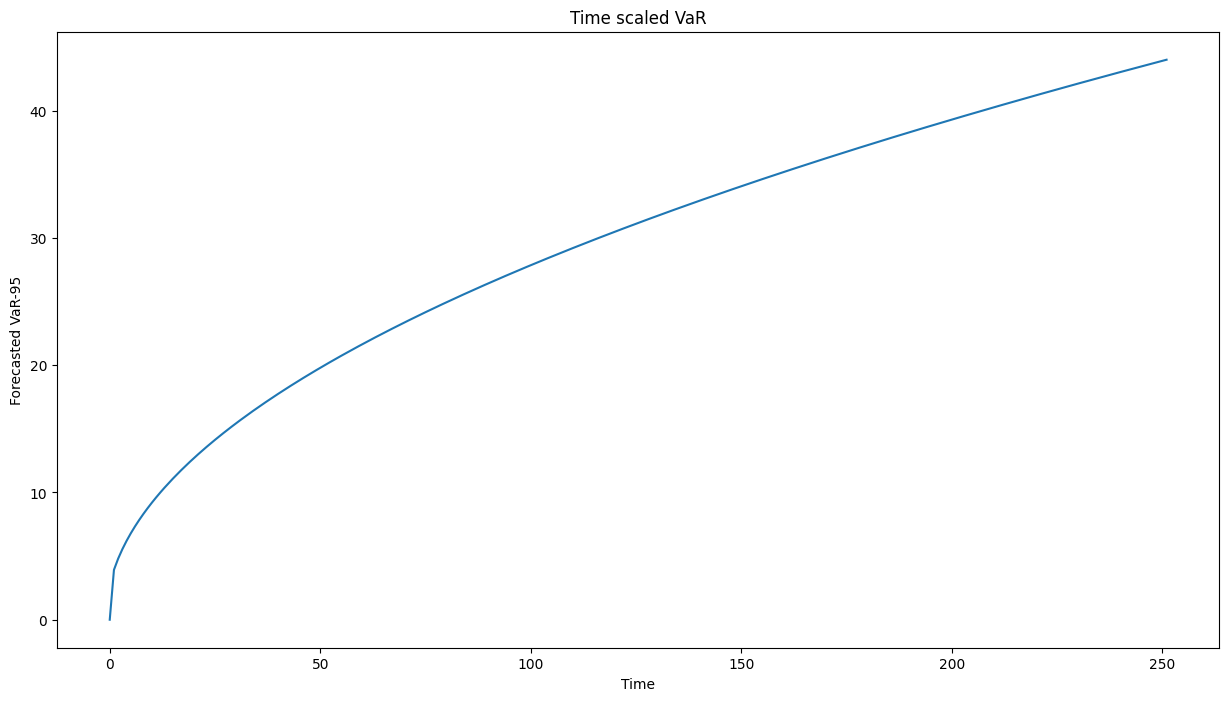

In [20]:
# Create an empty array to contain the VaR values
VaR_arr = np.empty([252, 2])

# Loop through the time period
for i in range(1,252):
  VaR_arr[i,0] = i
  VaR_arr[i,1] = var*np.sqrt(i+1)

# Plot the results
plot_var(VaR_arr)


**HINT**: VaR(t)= _VaR computed above_ * np.sqrt(t).

### **Section 6: Monte Carlo simulations**

Follow these steps:

1. Set the seed for the random number generator so that our results are reproducible.
2. Compute the log returns.
3. Compute the mean, variance, and standard deviation of the log returns.

In [28]:
np.random.seed(2022)

#initialise the parameters
mu=avg_daily_returns
vol=daily_std
n_sims=100000
T=252
sim_returns=[]

#loop thru the number of simulations
for i in range(n_sims):
    #generate random walk using the mu, vol, returns
    rand_returns=np.random.normal(mu,vol,T)

    #save the results
    sim_returns.append(rand_returns)

    #calcualte tand print VaR(95)
mc_var=np.percentile(sim_returns,5)
print("VaR(95) computed from the Monte Carlo simulations:", round(100*mc_var,2),"%")

VaR(95) computed from the Monte Carlo simulations: -3.17 %


4. Compute the drift.
5. Initialize the following parameters for simulations
- n_days: the number of days
- n_sims: the number of simulations. Here, we will run 1000 simulations.
6. Compute the daily returns using the formula below:


${returns}_{daily} = {e^r}$

where, ${r}={drift}+{stdev*z}$

7. Compute the VaR(95) and cVaR(95).
8. Plot the simulations.

In [31]:
def flatten(listofLists):
    return(item for sublist in sim_returns for item in sublist )

#convert this list of simulations into pandas series
sims=pd.Series(flatten(sim_returns))
len(sims)

25200000

In [33]:
# calculate CVaR
mc_cvar_95=sims[sims<mc_var].mean()
print("CVaR(95) computed from monte carlo simulations:",round(100*mc_cvar_95,2),"%")

CVaR(95) computed from monte carlo simulations: -4.0 %


**HINT**:
- random_rets = np.random.normal(mean, std, T). Append the simulations to a list.
- var(90) = np.percentile(_simulations list_, 10).

## Step 2

### Simulate the prices using Monte Carlo simulations.

1. Predict the prices. Set the value of the last adjusted close price as p0.
2. Initialize a numpy array of zeroes similar to the daily_returns computed above. You can use the function `np.zeros_like()`.
3. Set the initial value of the price as p0.
4. In a for loop for the number of days, we will fill the prices array with the prices computed from the `daily_returns` simulated above.
5. Convert the prices array to a dataframe.
6. Plot the simulations.

In [37]:
#initialise the parameters
#starting price
one_year_back=dt.date(end_date.year -1,end_date.month,end_date.day)

df1=yf.download(ticker,start_date,end_date)
prices=df1["Adj Close"]




[*********************100%%**********************]  1 of 1 completed


In [38]:
prices.iloc[0]

9.38484001159668

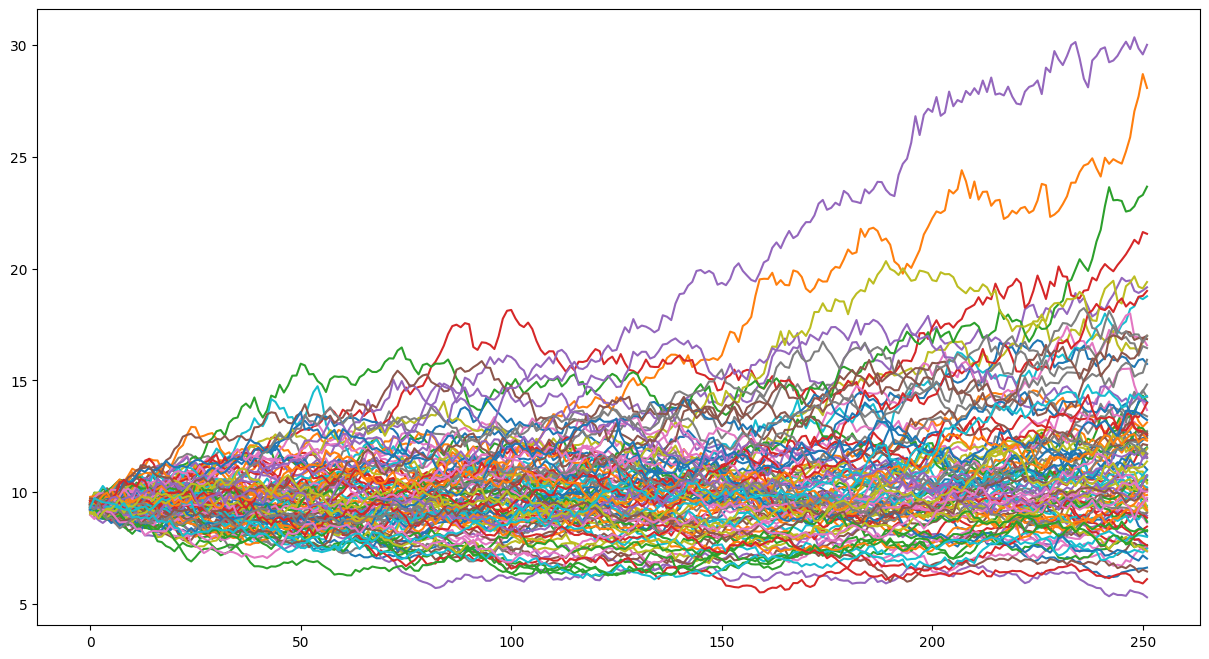

In [39]:
s0 = prices.iloc[0]
# Loop through 100 simulations
for i in range(100):

    # Generate the random returns
    rand_returns = np.random.normal(mu, vol, T) + 1

    # Create the Monte carlo path
    forecasted_values = s0*(rand_returns).cumprod()

    # Plot the Monte Carlo path
    plt.plot(range(T), forecasted_values)

# Show the simulations
plt.show()